In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("boston.csv", index_col=0)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [2]:
# 앞서 ML에서 EDA를 했으므로 여기는 생략

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
X = df.drop('PRICE',axis=1)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
y = df['PRICE']
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

In [6]:
#원핫 인코딩

#나는 처음에 원핫 인코딩이 그냥 범주형 데이터를 이진형태로 바꿔 주는 아이라고만 생각했는데,
#이게 웬걸 성능이 좋아지내? 아까 DL_classification만 봐도 이게 성능이 좀 좋아지는게 보인다.
Y = pd.get_dummies(y).values

In [7]:
#딥러닝 입력을 위해서 넘파일 배열로

X = X.values

In [8]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [9]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: PRICE, Length: 20640, dtype: float64

In [10]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [11]:

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 


((16512, 8), (16512, 3842), (4128, 8), (4128, 3842))

In [13]:

#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(8,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

C:\Users\tyra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,303 (5.09 KB)

 Trainable params: 1,303 (5.09 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:

N_EPOCHS = 20

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 9.8570e-04 - val_mse: 9.8570e-04
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.3319e-04 - mse: 9.3319e-04 - val_loss: 7.1515e-04 - val_mse: 7.1515e-04
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.6998e-04 - mse: 7.6998e-04 - val_loss: 6.4352e-04 - val_mse: 6.4352e-04
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.5454e-04 - mse: 6.5454e-04 - val_loss: 5.6637e-04 - val_mse: 5.6637e-04
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.8535e-04 - mse: 5.8535e-04 - val_loss: 5.2025e-04 - val_mse: 5.2025e-04
Epoch 8/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.3812e-04 - mse: 5.3812e-04 - val_loss: 4

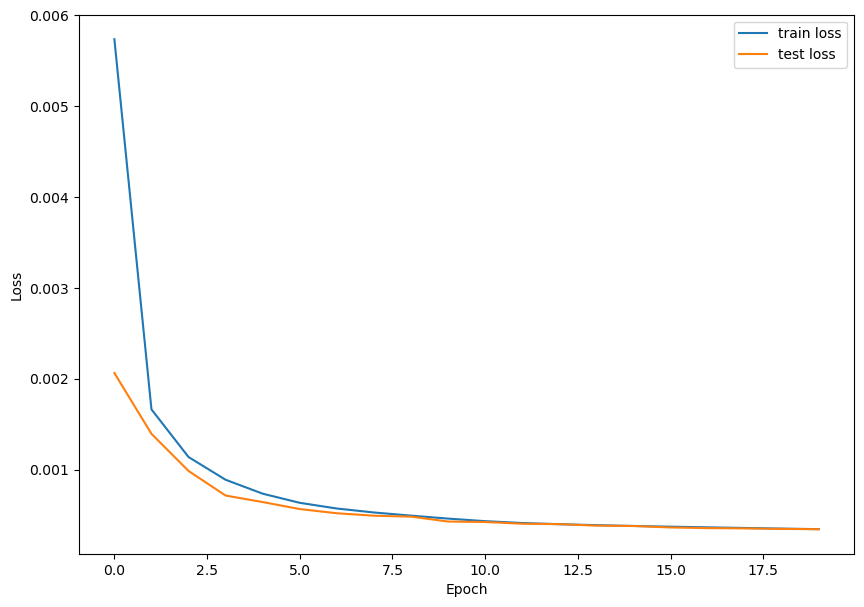

In [15]:

# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:

model.evaluate(X_test, y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 3.4453e-04 - mse: 3.4453e-04


[0.00034454173874109983, 0.00034454173874109983]

In [17]:
#에포크 횟수를 20으로 늘려보았는데 과대적합이 안 생기고 오히려 성능이 좋아졌다. 신기하다.
#이게 loss와 mse 값이 같은데 저 정도면 상당히 정확도가 좋다고 볼 수 있다.

In [ ]:
#loss 말고 좀 더 시각화에 좋은 것은 없을까 확인해보았다.

In [ ]:
### 그런데 회귀에서는 타깃값에다가 원핫인코딩을 사용하지 않는 것 같다. 
#고로 위의 예시는 틀린 부분이 있는 것.

C:\Users\tyra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,303 (5.09 KB)

 Trainable params: 1,303 (5.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.5225 - mse: 1.5225 - val_loss: 1.2880 - val_mse: 1.2880
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 1.2977 - mse: 1.2977 - val_loss: 1.2738 - val_mse: 1.2738
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 1.3116 - mse: 1.3116 - val_loss: 1.2398 - val_mse: 1.2398
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 1.2628 - mse: 1.2628 - val_loss: 1.1809 - val_mse: 1.1809
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 1.1751 - mse: 1.1751 - val_loss: 0.9004 - val_mse: 0.9004
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 0.9191 - mse: 0.9191 - val_loss: 0.9464 - val_mse: 0.9464
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.8226 - mse: 0.8226 - val_loss: 0.8748 - val_mse: 0.8748
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.8224 - mse: 0.8224 - val_loss: 0.8198 - val_mse: 0.8198
Epoch 9/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s

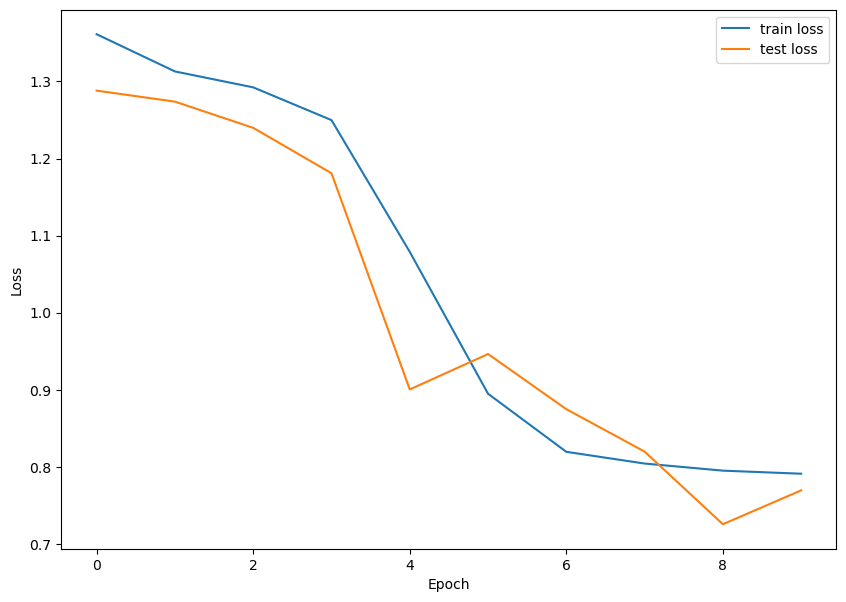

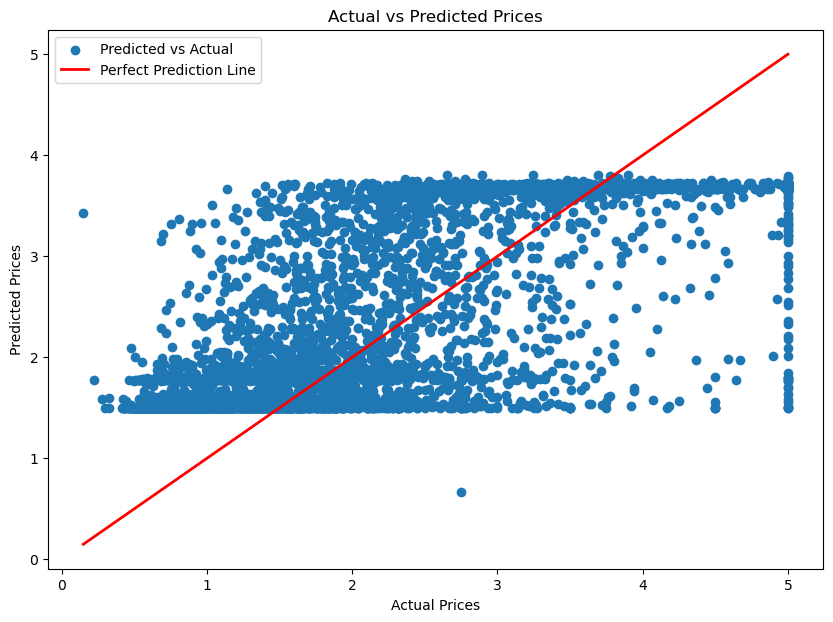

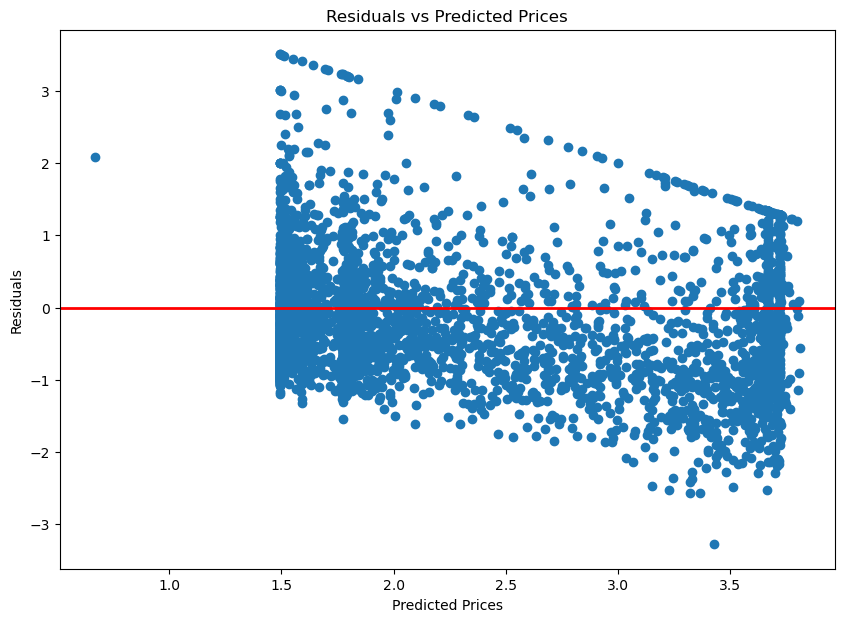

Mean Squared Error: 0.7695028888751461
R-squared: 0.40987001351877517


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv("boston.csv", index_col=0)

# 독립 변수(X)와 종속 변수(y) 분리
X = df.drop('PRICE', axis=1).values
y = df['PRICE'].values

# 데이터 나누기 (train/test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 모델 정의
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(8, input_shape=(X_train.shape[1],), activation='tanh'))
model.add(Dense(30, activation='tanh'))
model.add(Dense(30, activation='tanh'))
model.add(Dense(1))  # 출력층에서 원핫 인코딩 없이 연속 값 출력

# 모델 컴파일
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

# 모델 요약 출력
model.summary()

# 모델 학습
N_EPOCHS = 10
history = model.fit(X_train, y_train, epochs=N_EPOCHS, batch_size=32, validation_data=(X_test, y_test))

# 예측값 계산
y_pred = model.predict(X_test)

# 손실 시각화
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 실제값과 예측값 비교 (산점도)
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

# 잔차(residual) 시각화
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10,7))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', lw=2)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()

# 평가 지표 출력
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


In [ ]:
#위의 거가 너무 loss가 큰 것 같아서, 이거는 정규화를 사용하였다. 

C:\Users\tyra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,303 (5.09 KB)

 Trainable params: 1,303 (5.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.7560 - mse: 1.7560 - val_loss: 0.4957 - val_mse: 0.4957
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 0.4877 - mse: 0.4877 - val_loss: 0.4436 - val_mse: 0.4436
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 0.4434 - mse: 0.4434 - val_loss: 0.4098 - val_mse: 0.4098
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 0.3995 - mse: 0.3995 - val_loss: 0.3808 - val_mse: 0.3808
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.3746 - mse: 0.3746 - val_loss: 0.3812 - val_mse: 0.3812
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 0.3866 - mse: 0.3866 - val_loss: 0.3722 - val_mse: 0.3722
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.3848 - mse: 0.3848 - val_loss: 0.3568 - val_mse: 0.3568
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.3585 - mse: 0.3585 - val_loss: 0.3677 - val_mse: 0.3677
Epoch 9/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s

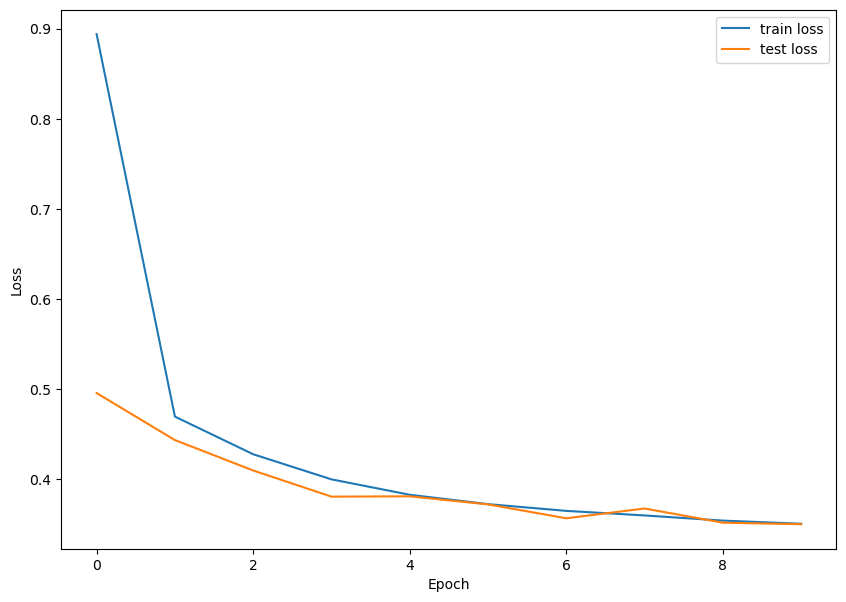

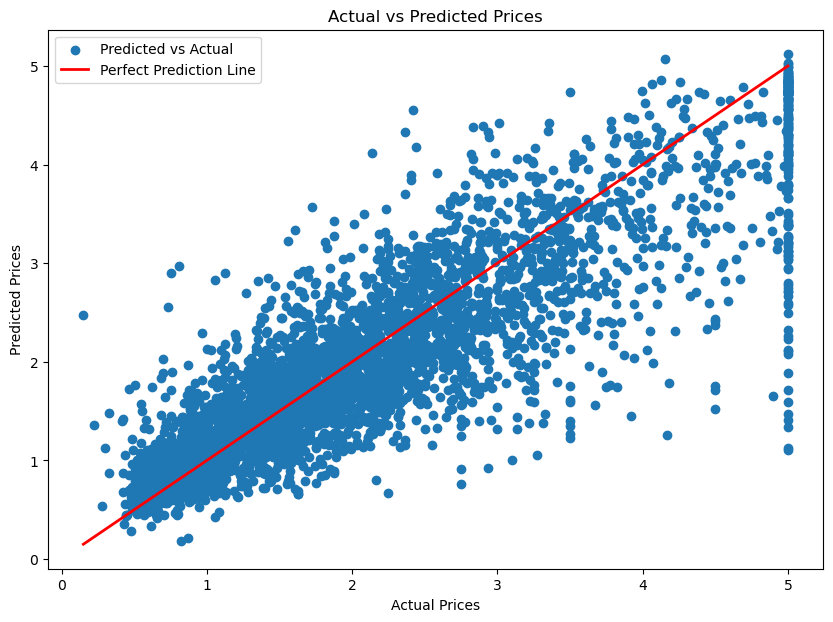

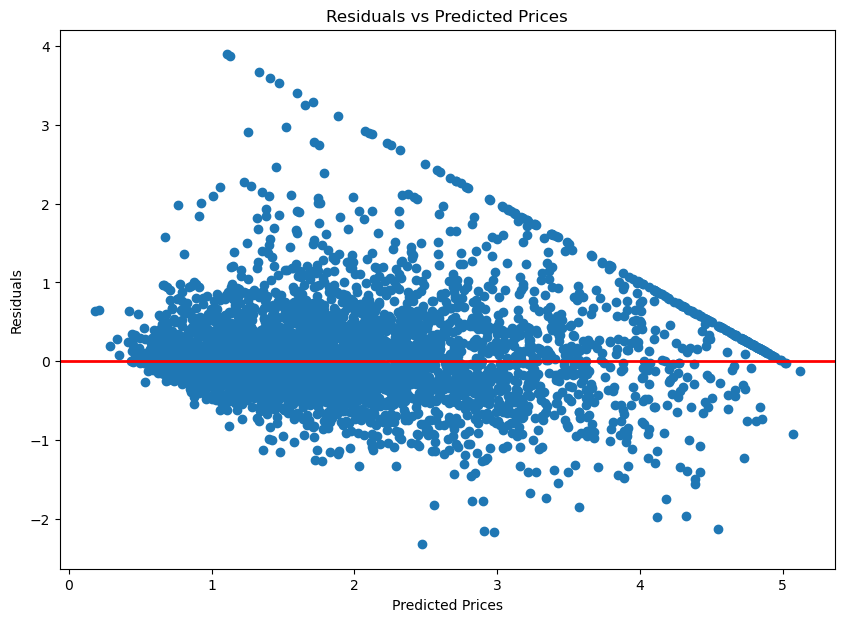

Mean Squared Error: 0.3502255701700044
R-squared: 0.7314128199155623


In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
df = pd.read_csv("boston.csv", index_col=0)

# 독립 변수(X)와 종속 변수(y) 분리
X = df.drop('PRICE', axis=1).values
y = df['PRICE'].values

# 데이터 스케일링 (StandardScaler 사용)
# 데이터의 분포를 평균 0, 표준편차 1로 변환하여 스케일을 맞춤 (모델 학습을 더 잘할 수 있게 함)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터 나누기 (train/test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 모델 정의
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(8, input_shape=(X_train.shape[1],), activation='tanh'))
model.add(Dense(30, activation='tanh'))
model.add(Dense(30, activation='tanh'))
model.add(Dense(1))  # 출력층에서 원핫 인코딩 없이 연속 값 출력

# 모델 컴파일
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

# 모델 요약 출력
model.summary()

# 모델 학습
N_EPOCHS = 10
history = model.fit(X_train, y_train, epochs=N_EPOCHS, batch_size=32, validation_data=(X_test, y_test))

# 예측값 계산
y_pred = model.predict(X_test)

# 손실 시각화
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 실제값과 예측값 비교 (산점도)
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

# 잔차(residual) 시각화
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10,7))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', lw=2)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()

# 평가 지표 출력
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
